In [1]:
import fsspec
import cf_xarray
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import numpy as np

# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem("reference", fo='s3://nextgen-dmac-cloud-ingest/rtofs/rtofs.rtofs_glo_3dz_6hrly_hvr_US_east.best.nc.zarr', remote_protocol='s3', remote_options={'anon':True}, target_protocol='s3', target_options={'anon':True})
m = fs.get_mapper("") 

ds = xr.open_dataset(m, engine="zarr", backend_kwargs=dict(consolidated=False), 
                      chunks={})
ds

<xarray.Dataset>
Dimensions:      (MT: 28, Depth: 40, Y: 1710, X: 742)
Coordinates:
    Date         (MT) float64 dask.array<chunksize=(28,), meta=np.ndarray>
  * Depth        (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
    Latitude     (Y, X) float32 dask.array<chunksize=(855, 371), meta=np.ndarray>
    Longitude    (Y, X) float32 dask.array<chunksize=(855, 371), meta=np.ndarray>
  * MT           (MT) datetime64[ns] 2023-09-26T06:00:00 ... 2023-10-03
  * X            (X) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
  * Y            (Y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
Data variables:
    salinity     (MT, Depth, Y, X) float32 dask.array<chunksize=(1, 10, 428, 186), meta=np.ndarray>
    temperature  (MT, Depth, Y, X) float32 dask.array<chunksize=(1, 10, 428, 186), meta=np.ndarray>
    u            (MT, Depth, Y, X) float32 dask.array<chunksize=(1, 10, 428, 186), meta=np.ndarray>
    v            (MT, Depth, Y, X) float32 dask.array<chunksize=(1, 10, 428, 186), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    experiment:   92.8
    history:      archv2ncdf3z
    institution:  National Centers for Environmental Prediction
    source:       HYCOM archive file
    title:        HYCOM ATLb2.00

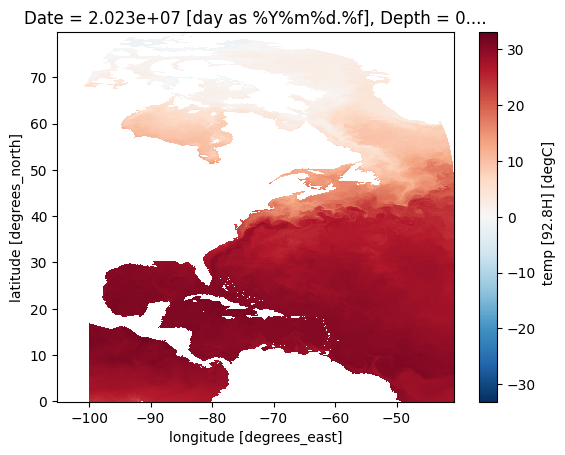

In [3]:
sst = ds.temperature.cf.isel(time=0).cf.sel(Depth=0, method='nearest')
sst.cf.plot(x='longitude', y='latitude')